# Problem 14.5

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual**

**Problem 14.5**


This problem is based on the paper by Heide et al., *Seasonal optimal mix of wind and solar power in a future, highly renewable Europe*, Renewable Energy 35 (2010) https://doi.org/10.1016/j.renene.2010.03.012

**Using the sinusoidal waves defined in Problem 14.1, we want to investigate the impact of wind and solar capacities on the balancing needs of a power system. To that end, we define the following parameters:**

**The parameter $\gamma$ is defined as the ratio between the average renewable generation (sum of wind and solar) and the average electricity demand.**

$ \gamma= \frac{<g^S_t>+<g^W_t>}{<d_t>}$

**where <> indicates annually averaged values.**

**The parameter $\alpha$ is defined as the average share of wind in renewable energy generation.**

$ \alpha= \frac{<g^W_t>}{<g^S_t>+<g^W_t>}$

**We define the mismatch $\Delta_t$ as the difference in every hour, between the renewable generation and
the load, that is,**
$\Delta_t = g^W_t + g^S_t - d_t$

**a) Assume that the installed capacities for solar PV and wind power are those required to produce, on average, 50% of the annual electricity demand with every technology (i.e., the capacities are 0.5 times the values calculated in sections (a) and (b) in Problem 14.1). Calculate total backup energy $E_B$, backup capacity $C_B$, and curtailed energy $E_C$.**

**(b) Assuming $\gamma$ = 1, calculate and plot the total backup energy $E_B$, backup capacity $C_B$ and curtailed energy $E_C$ for α values ranging from 0 to 1. Which combination of solar and wind generation (i.e., which $\alpha$ value) minimizes the required backup energy? Which combination of solar and wind generation minimizes the required backup capacity?**

**(c) Calculate and plot the backup energy $E_B$, backup capacity $C_B$, and curtailed energy $E_C$ for $\alpha$ values ranging from 0 to 1 and $\gamma$ values ranging from 0 to 1 and discuss the results.**

The mismatch is defined as the difference between the renewable generation and electricity load.

$\Delta_t = g^W_t + g^S_t - d_t = C_S · CF_S (1+sin (\frac{2\pi}{24}t)) + C_W · CF_W (1+sin (\frac{2\pi}{168}t))-d_t$ 

The capacity factors for solar and wind are $CF_S$=0.15 and $CF_W$=0.25. The installed capacities for solar and wind are $C_S$=3.33 GW and $C_W$=2GW

We will use the packages [numpy](https://numpy.org/) to operate with arrays and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import numpy as np
import matplotlib.pyplot as  plt

In [2]:
Delta = np.array([3.33*0.15*(1-np.sin(2*np.pi*t/24))+ 2*0.25*(1-np.sin(2*np.pi*t/168.4423))-1 for t in np.arange(0,8759)])

We can plot the mismatch for the first week of the year.

Text(0.5, 0, 'Hours')

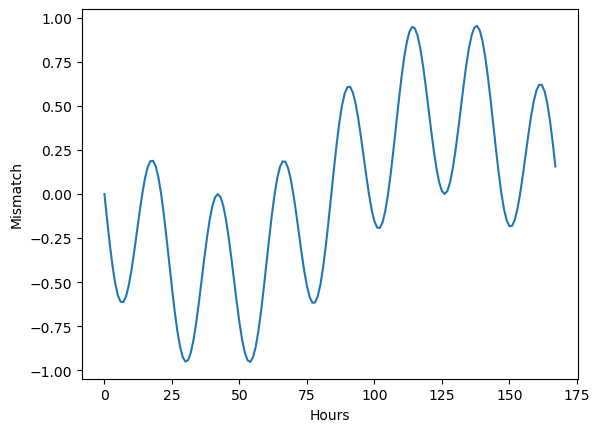

In [3]:
plt.plot(Delta[0:168])
plt.ylabel("Mismatch")
plt.xlabel("Hours")

The average mismatch throughout the year is zero, i.e., on average renewable generation equals demand.

In [4]:
np.mean(Delta)

-0.0005147592629695106

The total backup energy can be calculated as the sum of the negative mismatch.

In [5]:
np.sum(Delta[Delta<0])

-1776.4192547803914

The system will require 1,776 GWh of backup energy.

The capacity for backup generation can be calculated as the maximum of the negative mismatch values. 

In [6]:
np.max(np.abs(Delta[Delta<0]))

0.999999034824324

The system will require 0.99 GW of backup capacity, i.e., the required capacity is equal to the demand because there would be situations in which the renewable contribution will be zero. 

The curtailed energy can be calculated as the sum of the positive mismatch.

In [7]:
np.sum(Delta[Delta>0])

1771.9104783960415

The curtailed energy will be 1,776 GWh. Required backup energy and curtailed energy are equal in this system since, on average, renewable generation is equal to  demand. 

**b) Assuming $\gamma$=1, calculate and plot the total backup energy $E_B$, backup capacity $C_B$, and curtailed energy $E_C$, for $\alpha$ values ranging from 0 to 1.**

In [8]:
L = 1
CF_W = 0.25
CF_S = 0.15
E_B_array = []
C_B_array = []
E_C_array = []
alphas = np.arange(0,1.1,0.1)
for alpha in alphas:
    C_W = alpha*L/CF_W
    C_S = (1-alpha)*L/CF_S
    Delta = np.array([C_S*CF_S*(1-np.sin(2*np.pi*t/24))+ C_W*CF_W*(1-np.sin(2*np.pi*t/168.4423))-1 for t in np.arange(0,8759)])
    E_B = -np.sum(Delta[Delta<0])
    C_B = np.max(np.abs(Delta[Delta<0]))
    E_C = np.sum(Delta[Delta>0])
    E_B_array.append(E_B)
    C_B_array.append(C_B)
    E_C_array.append(E_C)

The backup energy is minimized when $\alpha$=0.5

Text(0, 0.5, 'Backup Energy, $E_B$ (GWh)')

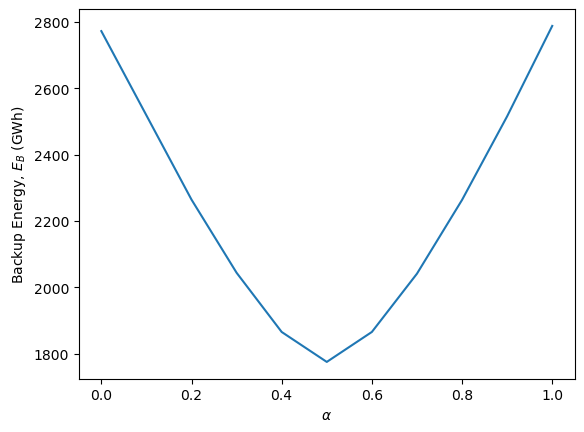

In [9]:
plt.plot(alphas, E_B_array)
plt.xlabel(r'$\alpha$')
plt.ylabel('Backup Energy, $E_B$ (GWh)')

The backup capacity is minimized when $\alpha$=0.9

Text(0, 0.5, 'Backup Capacity, $C_B$ (GW)')

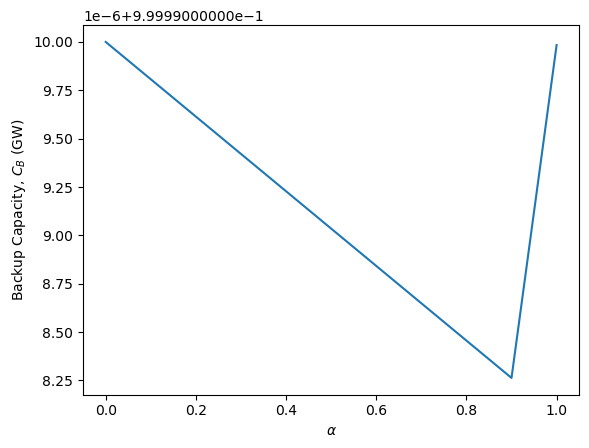

In [10]:
plt.plot(alphas, C_B_array)
plt.xlabel(r'$\alpha$')
plt.ylabel('Backup Capacity, $C_B$ (GW)')

The curtailed energy is minimized when $\alpha$=0.5

Text(0, 0.5, 'Curtailed Energy, $E_C$ (GWh)')

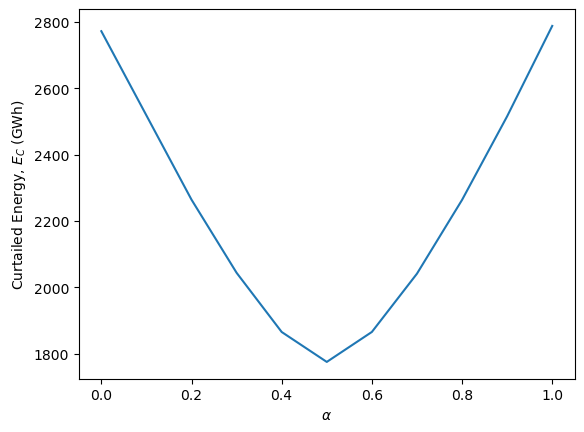

In [11]:
plt.plot(alphas, E_C_array)
plt.xlabel(r'$\alpha$')
plt.ylabel('Curtailed Energy, $E_C$ (GWh)')

**c) Calculate and plot the total backup energy $E_B$, backup capacity $C_B$, and curtailed energy $E_C$, for $\alpha$ values ranging from 0 to 1 and $\gamma$ values ranging from 0 to 1.**

In [12]:
CF_W = 0.25
CF_S = 0.15
E_B_matrix = []
C_B_matrix = []
E_C_matrix = []
gammas = np.arange(0,1.1,0.1)
for gamma in gammas:
    E_B_array =[]
    C_B_array =[]
    E_C_array =[]
    for alpha in alphas:
        C_W = alpha*gamma*L/CF_W
        C_S = (1-alpha)*gamma*L/CF_S
        Delta = np.array([C_S*CF_S*(1-np.sin(2*np.pi*t/24))+ C_W*CF_W*(1-np.sin(2*np.pi*t/168.4423))-1 for t in np.arange(0,8759)])
        E_B = -np.sum(Delta[Delta<0])
        C_B = np.max(np.abs(Delta[Delta<0]))
        E_C = np.sum(Delta[Delta>0])
        E_B_array.append(E_B)
        C_B_array.append(C_B)
        E_C_array.append(E_C)

    E_B_matrix.append(E_B_array)
    C_B_matrix.append(C_B_array)
    E_C_matrix.append(E_C_array)

The required backup energy is minimized for $\gamma$=1 and $\alpha$=0.5. For $\gamma$<1, renewable energy does not cover, on average, the annual electricity demand, so there is more need for backup energy. When a lot of backup energy is used, the solar/wind mix ($\alpha$ value) is not very critical. 

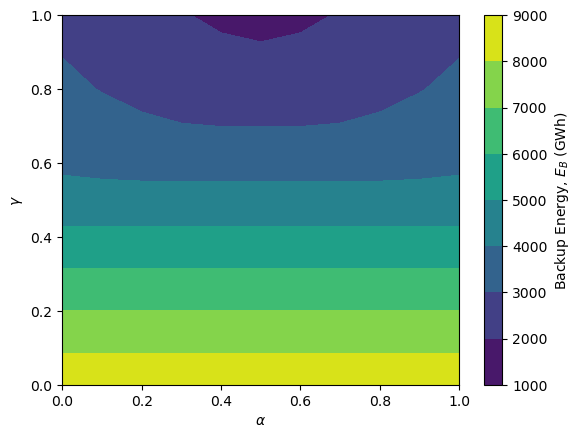

In [13]:
plt.contourf(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), E_B_matrix)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\gamma$')
cbar=plt.colorbar()
cbar.set_label('Backup Energy, $E_B$ (GWh)')

The required backup capacity is minimized for $\gamma$=1 and $\alpha$=0.9. For $\gamma$=0 (no renewable generation), the required backup capacity is 1. For $\gamma$=1 (renewable generation covering, on average, demand), the required backup capacity is still 0.825 GW.

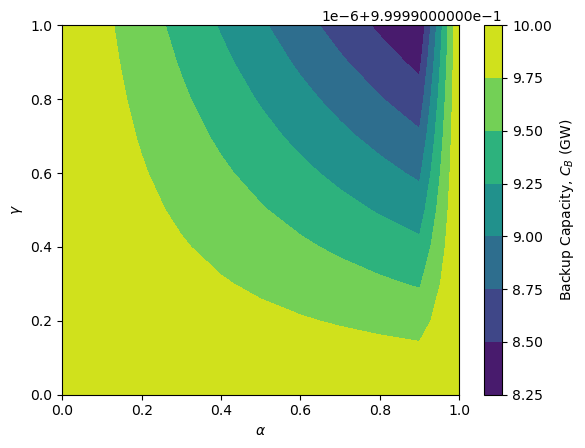

In [14]:
plt.contourf(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), C_B_matrix)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\gamma$')
cbar=plt.colorbar()
cbar.set_label('Backup Capacity, $C_B$ (GW)')

The curtailed energy is minimized for $\gamma$=0 since the renewable energy is not enough to cover the demand. For $\gamma$=1, the curtailed energy is minimized for $\alpha$=0.5.

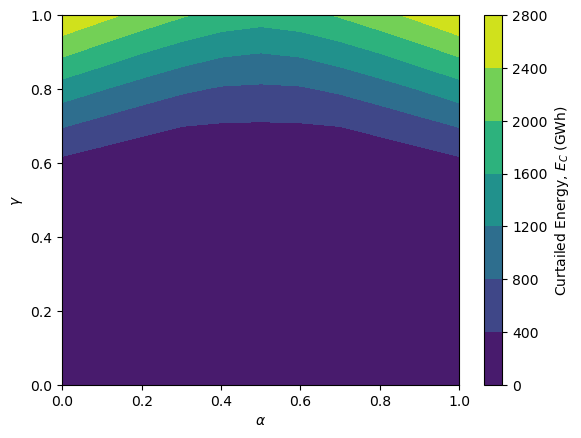

In [15]:
plt.contourf(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), E_C_matrix)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\gamma$')
cbar=plt.colorbar()
cbar.set_label('Curtailed Energy, $E_C$ (GWh)')